In [1]:
import pandas as pd

In [2]:
import glob
print(glob.glob("*.csv"))

['jiuye.csv', 'laiyuan.csv']


In [3]:
df_jiuye = pd.read_table("jiuye.csv",   # 档名
                       encoding = 'utf8',       # 编码
                       header = 3,              # 指定数据的标题为原始数据之第3行
                       skiprows = [35,36],      # 原始数据之第35, 36行跳过不计
                       sep =','                 # 分隔符设为',' read_table内置分隔符为\t
                      )
df_laiyuan = pd.read_table("laiyuan.csv",   # 档名
                       encoding = 'utf8',       # 编码
                       header = 3,              # 指定数据的标题为原始数据之第3行
                       skiprows = [35,36],      # 原始数据之第35, 36行跳过不计
                       sep =','                 # 分隔符设为',' read_table内置分隔符为\t
                      )

In [4]:
df = df_jiuye
df.columns = [ int(x.replace('年','')) if x!='地区' else x for x in df.columns]
years = [ x for x in df.columns if x!='地区'] 
df_melted = pd.melt(df, id_vars=['地区'], value_vars=years)
df_melted.columns = ['地区', '年', '个体户数']
df_jiuye_done = df_melted

In [5]:
df = df_laiyuan
df.columns = [ int(x.replace('年','')) if x!='地区' else x for x in df.columns]
years = [ x for x in df.columns if x!='地区'] 
df_melted = pd.melt(df, id_vars=['地区'], value_vars=years)
df_melted.columns = ['地区', '年', '收入来源']
df_laiyuan_done = df_melted

In [6]:
df_p = df_jiuye_done.join(df_laiyuan_done,lsuffix='', rsuffix='_laiyuan')

In [7]:
df_pp = df_p.drop(["地区_laiyuan","年_laiyuan"], axis=1).set_index(["地区","年"])

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

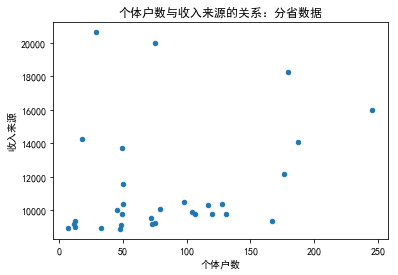

In [9]:
%matplotlib inline
df_pp.query("年==2006").plot(kind='scatter', x='个体户数', y='收入来源', 
          title = '个体户数与收入来源的关系：分省数据')